In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [269]:
import warnings
# Ignore all DeprecationWarnings globally
warnings.filterwarnings('ignore')

In [271]:
df = pd.read_csv("car_fuel_efficiency.csv")
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [272]:
target = 'fuel_efficiency_mpg'

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [274]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [275]:
df.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9202.000000,9704.000000
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


In [276]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [277]:
df.isnull().sum().sum()

np.int64(2622)

In [278]:
df = df.fillna(0)

In [279]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [280]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [281]:
len(df_train), len(df_val), len(df_test)

(5822, 1941, 1941)

In [282]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [283]:
df.isnull().sum().sum()

np.int64(0)

# One hot Encoding

In [284]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor

In [285]:
# Separate the target variable
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In [286]:
# Drop the target from feature dataframes
del df_train[target]
del df_val[target]
del df_test[target]

In [287]:
train_dicts = df_train.to_dict(orient = 'records')
val_dicts = df_val.to_dict(orient = 'records')

In [288]:
train_dicts = df_train.fillna(0).to_dict(orient = 'records')

In [289]:
val_dicts = df_val.fillna(0).to_dict(orient = 'records')

In [290]:
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.fit_transform(val_dicts)

In [291]:
df_train.shape, df_val.shape, df_test.shape

((5822, 10), (1941, 10), (1941, 10))

In [292]:
dt = DecisionTreeRegressor(max_depth=1, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=1)

In [293]:
X_train.shape, y_train.shape

((5822, 14), (5822,))

In [294]:
# Which feature is used for splitting the data?
# For a max_depth=1 tree, the splitting feature is the one at the root node (index 0).
# The feature index is stored in the tree's structure.
feature_index = dt.tree_.feature[0]
splitting_feature_name = dv.feature_names_[feature_index]

In [295]:
from sklearn.tree import export_text

In [296]:
print(f"The feature used for splitting the data (max_depth=1) is: {splitting_feature_name}")

The feature used for splitting the data (max_depth=1) is: vehicle_weight


In [297]:
# --- See the Full Tree Structure ---
# Use export_text to visualize the tree structure
tree_text = export_text(dt, feature_names=dv.feature_names_)
print(tree_text)

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



# Calculating RMSE

In [298]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

In [299]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [300]:
y_train.shape

(5822,)

In [301]:
# Predict on test set
y_pred = rf.predict(X_val)

In [302]:
# 1. Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_pred)

In [303]:
y_val.shape, y_train.shape

((1941,), (5822,))

In [304]:
# 2. Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
rmse

np.float64(0.45997775573361477)

In [305]:
def calculate_rmse(y_val, y_pred):
    return np.sqrt(mean_squared_error(y_val, y_pred))
    

In [306]:
calculate_rmse(y_val, y_pred)

np.float64(0.45997775573361477)

In [307]:
y_train.shape

(5822,)

# Number of Estimators

In [308]:
scores = []

d = 10

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n,
                               max_depth=d,
                               random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = round(np.sqrt(mse),3)
    scores.append((d, n, rmse))
    

In [309]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,n_estimators,rmse
0,10,10,0.452
1,10,20,0.449
2,10,30,0.446
3,10,40,0.444
4,10,50,0.443
5,10,60,0.442
6,10,70,0.442
7,10,80,0.442
8,10,90,0.442
9,10,100,0.442


In [310]:
# Find the point where improvement stops
stopping_n = 200 # Default to 200 if it keeps improving


In [311]:
# Determine the n_estimators where RMSE stops improving (within 3 decimal places)
# Find the minimum RMSE
min_rmse = round(df_scores['rmse'].min(), 3)
min_rmse

np.float64(0.44)

In [312]:
# Filter for all n_estimators that achieve this minimum or better (within tolerance)
# Note: Since Random Forest error tends to decrease and then plateau, we look for
# where the RMSE stabilizes at the minimum value.

# We will define 'stops improving' as the first 'n' after which all subsequent
# RMSE values are NOT significantly lower (i.e., within the 3 decimal tolerance).
for i in range(1, len(df_scores)):
    prev_rmse = round(df_scores.loc[i-1, 'rmse'], 3)
    curr_rmse = round(df_scores.loc[i, 'rmse'], 3)
    
    

In [313]:
# If the current RMSE is not lower than the previous one, improvement has stopped 
    # (or is insignificant for 3 decimal places).
if curr_rmse >= prev_rmse:
    print(f"\n--- Conclusion ---")
    print(f"RMSE (rounded to 3 decimals) stabilizes at {prev_rmse} at n_estimators = {df_scores.loc[i-1, 'n_estimators']}")
    print(f"The first value of n_estimators where RMSE stopped improving is **{df_scores.loc[i, 'n_estimators']}**.")
    
if i == len(df_scores) - 1:
     print(f"\n--- Conclusion ---")
     print("RMSE continued to improve/fluctuate up to the maximum n_estimators of 200.")


--- Conclusion ---
RMSE (rounded to 3 decimals) stabilizes at 0.44 at n_estimators = 190
The first value of n_estimators where RMSE stopped improving is **200**.

--- Conclusion ---
RMSE continued to improve/fluctuate up to the maximum n_estimators of 200.


In [314]:
y_train.shape

(5822,)

# Best Max Depth

In [315]:
all_scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                   max_depth=d,
                                   random_state=1)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        rmse = round(np.sqrt(mse),3)
        
        # Store the results: (max_depth, n_estimators, rmse)
        all_scores.append((d, n, rmse))

In [316]:
y_train.shape

(5822,)

In [317]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(all_scores, columns=columns)
df_scores['max_depth'] == 10

0      True
1      True
2      True
3      True
4      True
      ...  
75    False
76    False
77    False
78    False
79    False
Name: max_depth, Length: 80, dtype: bool

In [318]:
# --- 5. Analysis ---
df_scores = pd.DataFrame(all_scores, columns=['max_depth', 'n_estimators', 'rmse'])

In [319]:
# Calculate the mean RMSE for each max_depth
mean_rmse_by_depth = df_scores.groupby('max_depth')['rmse'].mean().reset_index()

In [320]:
# Find the best max_depth (lowest mean RMSE)
best_depth_result = mean_rmse_by_depth.loc[mean_rmse_by_depth['rmse'].idxmin()]

In [321]:
# Output the best max_depth
print(f"The best max_depth is: {best_depth_result['max_depth']}")
print("Mean RMSE by Max Depth:")
print(mean_rmse_by_depth.to_markdown(index=False))

The best max_depth is: 10.0
Mean RMSE by Max Depth:
|   max_depth |   rmse |
|------------:|-------:|
|          10 | 0.4424 |
|          15 | 0.445  |
|          20 | 0.4457 |
|          25 | 0.4457 |


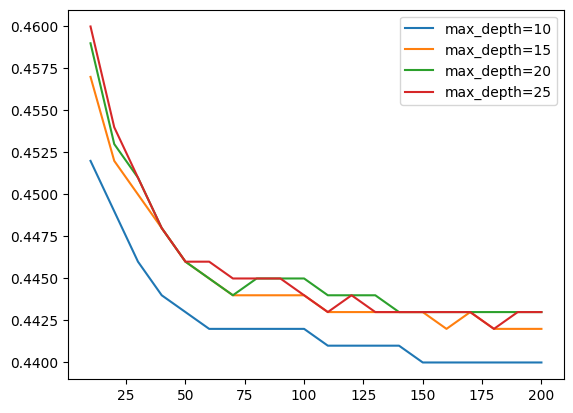

In [322]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label= 'max_depth=%d' % d)

plt.legend()

In [323]:
y_train.shape

(5822,)

# --Feature Importance

In [324]:
# Separate target and features
y1 = df['fuel_efficiency_mpg']
X1 = df.drop(columns=['fuel_efficiency_mpg'])

# Identify numerical and categorical columns
numerical_cols = X1.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X1.select_dtypes(include=['object', 'category']).columns

# Impute missing numerical values with the mean
for col in numerical_cols:
    X1[col].fillna(X1[col].mean(), inplace=True)

# One-hot encode categorical features
X1 = pd.get_dummies(X1, columns=categorical_cols, drop_first=True)

# --- 2. Data Splitting ---
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.2, random_state=1)

In [325]:
rf_importance = RandomForestRegressor(n_estimators=10,
                                      max_depth=20,
                                      random_state=1,
                                      n_jobs=-1)
rf_importance.fit(X1_train, y1_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [326]:
y1_train.shape

(7763,)

In [327]:
categorical_cols

Index(['origin', 'fuel_type', 'drivetrain'], dtype='object')

In [328]:
# --- 4. Feature Importance Extraction and Analysis ---
# Get feature names and their importance scores
feature_names = X1_train.columns
importances = rf_importance.feature_importances_

In [329]:
X1_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,origin_Europe,origin_USA,fuel_type_Gasoline,drivetrain_Front-wheel drive
6957,130,6.0,0.0,3023.590618,15.5,2004,0.0,False,False,False,False
4344,220,6.0,149.0,2823.234584,14.2,2001,-1.0,False,True,True,True
2975,300,4.0,193.0,2650.295363,20.7,2007,-2.0,True,False,True,True
3253,150,3.0,153.0,2191.060099,16.6,2018,1.0,True,False,True,True
9364,260,5.0,205.0,2332.785273,18.8,2020,0.0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
2895,130,3.0,135.0,3848.980605,16.7,2002,0.0,False,False,False,True
7813,170,2.0,129.0,3749.153246,15.5,2013,-1.0,False,False,True,True
905,230,3.0,178.0,2596.657191,16.5,2000,-1.0,True,False,False,True
5192,270,4.0,113.0,1860.388023,12.2,2017,-1.0,False,False,True,True


In [330]:
df_importance = pd.DataFrame({'feature': feature_names,'importance': importances}).sort_values(by='importance', ascending=False)

In [331]:
# Features to compare as specified in the homework question
target_features = ['vehicle_weight', 'horsepower', 'acceleration', 'engine_displacement']

In [332]:
# Filter the importance table to include only the target features
df_target_importance = df_importance[df_importance['feature'].isin(target_features)].copy()

In [333]:
# Find the most important feature among the target group
most_important_feature = df_target_importance.iloc[0]['feature']

In [334]:
print("Feature Importances for Target Features:")
print(df_target_importance.to_markdown(index=False))
print(f"\nThe most important feature among the specified four is: {most_important_feature}")

Feature Importances for Target Features:
| feature             |   importance |
|:--------------------|-------------:|
| vehicle_weight      |   0.95969    |
| horsepower          |   0.0158311  |
| acceleration        |   0.0116949  |
| engine_displacement |   0.00334409 |

The most important feature among the specified four is: vehicle_weight


# XGBOOST_ETA

In [369]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [370]:
import xgboost as xgb

In [371]:

# Create the dictionary lists
X_train_dict = df_train.to_dict(orient='records')
X_val_dict = df_val.to_dict(orient='records')

# Assuming X_train_dict and X_val_dict are the dictionary lists before vectorization

# 1. Fit the DictVectorizer ONLY on the training data and transform it
# This step creates X_train and defines the feature space
X_train = dv.fit_transform(X_train_dict) 

# 2. Use the fitted dv to transform the validation data
X_val = dv.transform(X_val_dict) 

# 3. Get the feature names from the fitted dv and convert to a list
# This list must match the columns in X_train and X_val
features = dv.get_feature_names_out().tolist()

# 4. Create the DMatrices
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [372]:
X_train.shape, y_train.shape

((5822, 14), (5822,))

In [373]:
X_val.shape, y_val.shape

((1941, 14), (1941,))

In [376]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [378]:
y_pred = model.predict(dval)
y_pred

array([18.57484 , 15.392803, 18.031397, ..., 14.109715, 13.487703,
       15.580334], shape=(1941,), dtype=float32)

In [379]:
from sklearn.metrics import root_mean_squared_error

In [380]:
root_mean_squared_error(y_val, y_pred)

0.46203156380184496

In [381]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [383]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [384]:
y_pred1 = model.predict(dval)
y_pred1

array([18.553988 , 15.198981 , 18.256323 , ..., 14.695651 , 13.488508 ,
       15.7029295], shape=(1941,), dtype=float32)

In [385]:
root_mean_squared_error(y_val, y_pred1)

0.43151829815693454

In [388]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200, evals=watchlist)

[0]	train-rmse:1.81393	val-rmse:1.85444
[1]	train-rmse:1.31919	val-rmse:1.35353
[2]	train-rmse:0.98120	val-rmse:1.01316
[3]	train-rmse:0.75443	val-rmse:0.78667
[4]	train-rmse:0.60680	val-rmse:0.64318
[5]	train-rmse:0.51381	val-rmse:0.55664
[6]	train-rmse:0.45470	val-rmse:0.50321
[7]	train-rmse:0.41881	val-rmse:0.47254
[8]	train-rmse:0.39534	val-rmse:0.45509
[9]	train-rmse:0.38038	val-rmse:0.44564
[10]	train-rmse:0.37115	val-rmse:0.43896
[11]	train-rmse:0.36361	val-rmse:0.43594
[12]	train-rmse:0.35850	val-rmse:0.43558
[13]	train-rmse:0.35365	val-rmse:0.43394
[14]	train-rmse:0.35025	val-rmse:0.43349
[15]	train-rmse:0.34666	val-rmse:0.43362
[16]	train-rmse:0.34459	val-rmse:0.43378
[17]	train-rmse:0.34128	val-rmse:0.43405
[18]	train-rmse:0.33822	val-rmse:0.43391
[19]	train-rmse:0.33709	val-rmse:0.43374
[20]	train-rmse:0.33553	val-rmse:0.43376
[21]	train-rmse:0.33243	val-rmse:0.43453
[22]	train-rmse:0.33031	val-rmse:0.43510
[23]	train-rmse:0.32815	val-rmse:0.43601
[24]	train-rmse:0.32670	va

In [368]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

[0]	train-rmse:1.81393	val-rmse:1.85444
[5]	train-rmse:0.51381	val-rmse:0.55664
[10]	train-rmse:0.37115	val-rmse:0.43896
[15]	train-rmse:0.34666	val-rmse:0.43362
[20]	train-rmse:0.33553	val-rmse:0.43376
[25]	train-rmse:0.32268	val-rmse:0.43683
[30]	train-rmse:0.31475	val-rmse:0.43752
[35]	train-rmse:0.30960	val-rmse:0.43784
[40]	train-rmse:0.30202	val-rmse:0.43968
[45]	train-rmse:0.29126	val-rmse:0.44024
[50]	train-rmse:0.28456	val-rmse:0.44140
[55]	train-rmse:0.27618	val-rmse:0.44225
[60]	train-rmse:0.26768	val-rmse:0.44290
[65]	train-rmse:0.26174	val-rmse:0.44352
[70]	train-rmse:0.25489	val-rmse:0.44531
[75]	train-rmse:0.24792	val-rmse:0.44628
[80]	train-rmse:0.24254	val-rmse:0.44689
[85]	train-rmse:0.23644	val-rmse:0.44749
[90]	train-rmse:0.23193	val-rmse:0.44839
[95]	train-rmse:0.22475	val-rmse:0.44904
[100]	train-rmse:0.21754	val-rmse:0.45039
[105]	train-rmse:0.21323	val-rmse:0.45075
[110]	train-rmse:0.20766	val-rmse:0.45166
[115]	train-rmse:0.20189	val-rmse:0.45237
[120]	train-rm